In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from scipy.special import kv, gamma

from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Funciones

In [2]:
matern_model = lambda t, nu: np.vectorize(lambda x: 2**(1-nu) / gamma(nu) * (t*x)**nu * kv(nu, t*x))

def cov_matrix(cov_model, X_1, X_2, rho=1):
    return rho * np.nan_to_num(cov_model(cdist(X_1,X_2)), nan=1)

Kriging simple

In [3]:
def kriging(x, X, Y, sigma, cov):
    '''
    x : prediction point
    X : the vector of observation points
    Y : observations
    sigma : covariance matrix of observations
    cov : covariance function cov(h) 
    '''
    return cov_matrix(cov, x, X) @ np.linalg.solve(sigma, Y)

Simulemos

In [4]:
n = 500
d = 2
X = np.random.uniform(0, n, (n, d))

theta = 5/n
nu = 1/2

In [5]:
sigma = cov_matrix(matern_model(theta, nu), X, X)

In [6]:
Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, n)

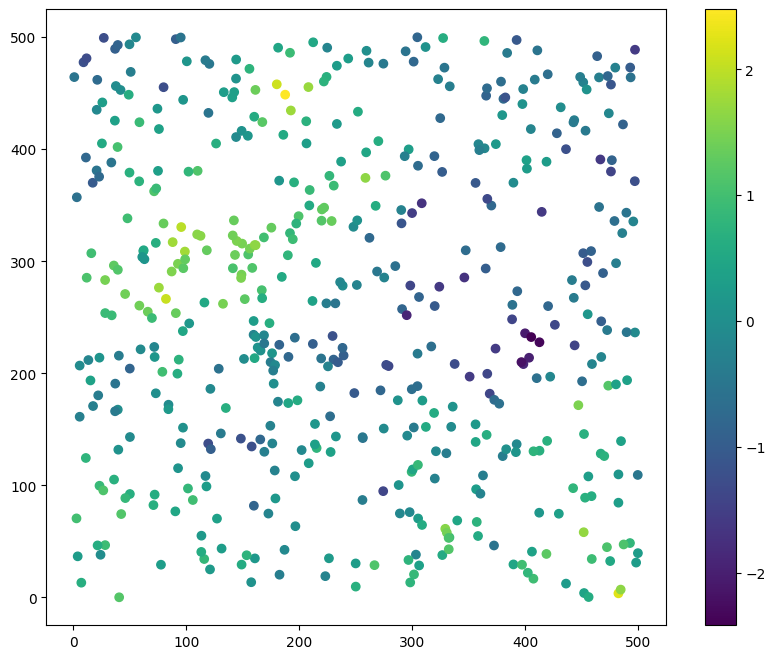

In [7]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], c=Y)
plt.colorbar();

Leave-one-out

In [9]:
%%time
Y_pred = []
for i in range(0,n):
    sigma_aux = np.delete(np.delete(sigma, i, axis=0), i, axis=1)

    X_aux = np.delete(X, i, axis=0)
    Y_aux = np.delete(Y, i, axis=0)
    
    Y_pred.append(kriging(X[[i]], X_aux, Y_aux, sigma_aux, matern_model(theta, nu)))

Y_pred = np.array(Y_pred)

CPU times: total: 16.3 s
Wall time: 17.8 s


In [10]:
root_mean_squared_error(Y, Y_pred)

0.37894472748207014

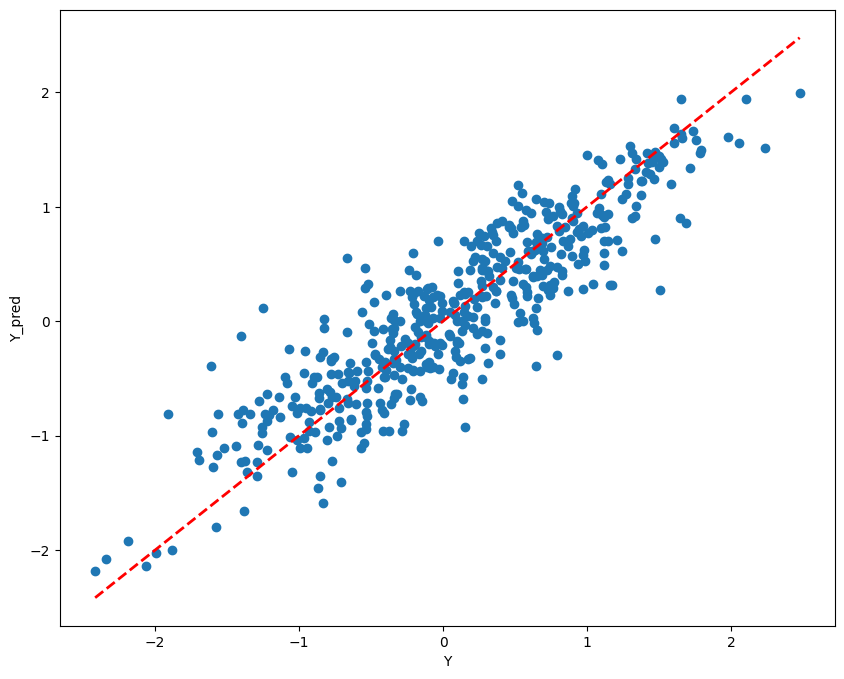

In [11]:
plt.figure(figsize=(10,8))

plt.scatter(Y, Y_pred)
plt.plot([np.min(Y), np.max(Y)], [np.min(Y), np.max(Y)], ls = '--', lw = 2, c = 'r')
plt.xlabel('Y')
plt.ylabel('Y_pred');